In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [2]:
data = pd.read_csv("processed.txt")

In [3]:
data.shape

(864, 3)

In [4]:
data["home_win"].describe()

count    864.000000
mean       0.565972
std        0.495916
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [5]:
data[data["home_pct"] > data["away_pct"]]["home_win"].describe()

count    363.000000
mean       0.969697
std        0.171656
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [6]:
data[data["away_pct"] == data["home_pct"]]["home_win"].mean()

0.6149425287356322

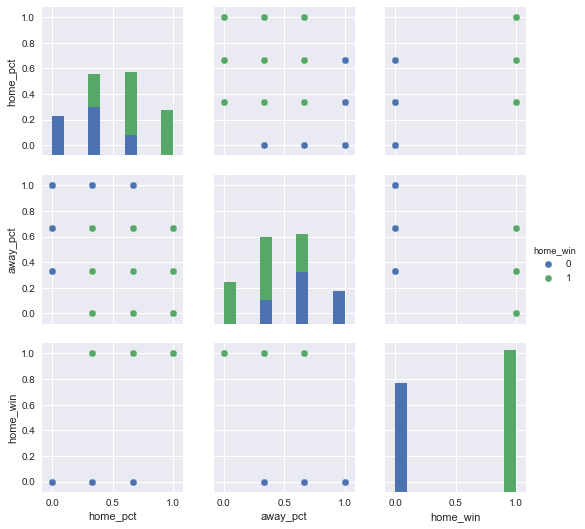

In [7]:
sns.pairplot(data, hue='home_win')

In [8]:
y = data.home_win

In [9]:
X = data.drop("home_win", axis=1)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

def get_model_and_grid():
    
    #model = GaussianNB()
    #model = DecisionTreeClassifier()

    model = AdaBoostClassifier()
    param_grid = {
        "learning_rate": [0.01, 0.1, 0.5, 1, 10],
        "n_estimators": [1, 10, 50, 100]
    }

    #print("getting model")
    #
    #model = SVC()
    #
    #param_grid = {
    #    "C": [0.01, 0.1, 1, 10, 100],
    #    "kernel": ['linear', 'rbf']
    # }

    return model, param_grid

In [11]:
from sklearn.model_selection import GridSearchCV

model, param_grid = get_model_and_grid()

grid = GridSearchCV(model, param_grid, cv=5)

In [12]:
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

grid.cv_results_

{'learning_rate': 0.01, 'n_estimators': 100}
0.875


C:\Users\lsimu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lsimu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lsimu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lsimu\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([ 0.00299926,  0.01459398,  0.06899691,  0.12399592,  0.00199971,
         0.01320539,  0.06120577,  0.11720695,  0.00258827,  0.01399508,
         0.06720943,  0.11478925,  0.00159731,  0.01299481,  0.06140251,
         0.11280427,  0.00179973,  0.01339674,  0.05920029,  0.10899982]),
 'mean_score_time': array([ 0.00040059,  0.00139527,  0.0049953 ,  0.00899019,  0.        ,
         0.00138965,  0.00519261,  0.00760636,  0.00020418,  0.00120192,
         0.00539627,  0.00780902,  0.00080681,  0.00118604,  0.00460706,
         0.00778885,  0.00039568,  0.00100203,  0.00399909,  0.00779939]),
 'mean_test_score': array([ 0.78356481,  0.78356481,  0.84143519,  0.875     ,  0.78356481,
         0.875     ,  0.875     ,  0.875     ,  0.78356481,  0.875     ,
         0.875     ,  0.875     ,  0.78356481,  0.875     ,  0.875     ,
         0.875     ,  0.78356481,  0.38773148,  0.38773148,  0.38773148]),
 'mean_train_score': array([ 0.78356616,  0.78356616,  0.846066

In [13]:
from sklearn.metrics import confusion_matrix

model = grid.best_estimator_

y_model = model.predict(X)

mat = confusion_matrix(y_true=y, y_pred=y_model)

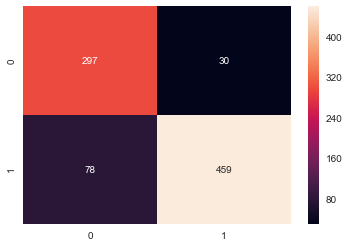

In [14]:
sns.heatmap(mat.T, annot=True, fmt='d')

In [15]:
y.value_counts()

1    489
0    375
Name: home_win, dtype: int64

In [16]:
from sklearn.externals import joblib

joblib.dump(grid.best_estimator_, "best_estimator.pkl")

['best_estimator.pkl']